In [1]:
# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD,Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# ap = argparse.ArgumentParser()

# ap.add_argument('-d','--dataset',required=True,help="path to input dataset of images")
# # ap.add_argument('-m','--model',required=True,help="path to the output trained model")
# # ap.add_argument('-l','--label-bin',required=True,help="path to output label binarize")
# # ap.add_argument('-p','--plot',required=True,help='path to the output accuracy/loss plot')

# args = vars(ap.parse_args())

args = {"dataset":"animals","model":"output/simple_nn_model_mostafa","label_bin":"output/label_bin_simple_nn_model_mostafa"}



Using TensorFlow backend.


In [2]:
data = [] 
labels = [] 

imagepaths = paths.list_images(args["dataset"])

for imagepath in imagepaths:
    img = cv2.imread(imagepath)
    img = cv2.resize(img,(32,32)).flatten()
    data.append(img)
    labels.append(imagepath.split(os.path.sep)[-2])
data = np.array(data,dtype='float')/255.0
labels = np.array(labels)

In [3]:
data[4], labels[4]

(array([0.97254902, 0.92941176, 0.91764706, ..., 0.79607843, 0.79215686,
        0.80784314]), 'dogs')

In [4]:
(trainX, testX, trainY, testY) = train_test_split(data,labels,test_size=0.25,random_state=42)


In [5]:
testY.shape , testY[1]

((750,), 'panda')

In [6]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
lb.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [7]:
testY.shape , testY[1]

((750, 3), array([0, 0, 1]))

In [8]:
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3,),activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(len(lb.classes_), activation='softmax'))

In [9]:
learning_rate = 0.0001
epochs = 2000
batch_size = 1000

In [10]:
opt = Adam(lr=learning_rate)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size)

Train on 2250 samples, validate on 750 samples
Epoch 1/2000
2250/2250 [==============================] - 1s 580us/step - loss: 1.1236 - acc: 0.3258 - val_loss: 1.0822 - val_acc: 0.4533
Epoch 2/2000
2250/2250 [==============================] - 1s 364us/step - loss: 1.0829 - acc: 0.4609 - val_loss: 1.0773 - val_acc: 0.4547
Epoch 3/2000
2250/2250 [==============================] - 1s 324us/step - loss: 1.0582 - acc: 0.4831 - val_loss: 1.0323 - val_acc: 0.5280
Epoch 4/2000
2250/2250 [==============================] - 1s 321us/step - loss: 1.0299 - acc: 0.5044 - val_loss: 1.0125 - val_acc: 0.5093
Epoch 5/2000
2250/2250 [==============================] - 1s 323us/step - loss: 1.0073 - acc: 0.5147 - val_loss: 1.0021 - val_acc: 0.4880
Epoch 6/2000
2250/2250 [==============================] - 1s 323us/step - loss: 0.9910 - acc: 0.5222 - val_loss: 0.9844 - val_acc: 0.4813
Epoch 7/2000
2250/2250 [==============================] - 1s 323us/step - loss: 0.9703 - acc: 0.5387 - val_loss: 0.9623 - val

2250/2250 [==============================] - 1s 327us/step - loss: 0.7625 - acc: 0.6262 - val_loss: 0.8125 - val_acc: 0.6067
Epoch 60/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.7610 - acc: 0.6356 - val_loss: 0.8104 - val_acc: 0.6067
Epoch 61/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.7583 - acc: 0.6484 - val_loss: 0.8165 - val_acc: 0.6013
Epoch 62/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.7581 - acc: 0.6364 - val_loss: 0.8107 - val_acc: 0.6107
Epoch 63/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.7555 - acc: 0.6440 - val_loss: 0.8120 - val_acc: 0.6013
Epoch 64/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.7542 - acc: 0.6449 - val_loss: 0.8167 - val_acc: 0.6120
Epoch 65/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.7551 - acc: 0.6418 - val_loss: 0.8095 - val_acc: 0.6067
Epoch 66/2000
2250/2250 [================

Epoch 118/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.6736 - acc: 0.7058 - val_loss: 0.8097 - val_acc: 0.5933
Epoch 119/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.6707 - acc: 0.7031 - val_loss: 0.8092 - val_acc: 0.5933
Epoch 120/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.6690 - acc: 0.7124 - val_loss: 0.8077 - val_acc: 0.6040
Epoch 121/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.6725 - acc: 0.7044 - val_loss: 0.8177 - val_acc: 0.5973
Epoch 122/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.6706 - acc: 0.6987 - val_loss: 0.8097 - val_acc: 0.5987
Epoch 123/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.6676 - acc: 0.7080 - val_loss: 0.8120 - val_acc: 0.5880
Epoch 124/2000
2250/2250 [==============================] - 1s 315us/step - loss: 0.6680 - acc: 0.7116 - val_loss: 0.8144 - val_acc: 0.6027
Epoch 125/2000
2250/

2250/2250 [==============================] - 1s 319us/step - loss: 0.5863 - acc: 0.7622 - val_loss: 0.8380 - val_acc: 0.5907
Epoch 177/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.5829 - acc: 0.7667 - val_loss: 0.8413 - val_acc: 0.6000
Epoch 178/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.5816 - acc: 0.7676 - val_loss: 0.8309 - val_acc: 0.6000
Epoch 179/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.5787 - acc: 0.7649 - val_loss: 0.8554 - val_acc: 0.5893
Epoch 180/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.5772 - acc: 0.7707 - val_loss: 0.8439 - val_acc: 0.5880
Epoch 181/2000
2250/2250 [==============================] - 1s 315us/step - loss: 0.5830 - acc: 0.7560 - val_loss: 0.8594 - val_acc: 0.5880
Epoch 182/2000
2250/2250 [==============================] - 1s 319us/step - loss: 0.5825 - acc: 0.7609 - val_loss: 0.8408 - val_acc: 0.5947
Epoch 183/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 320us/step - loss: 0.5014 - acc: 0.8147 - val_loss: 0.8698 - val_acc: 0.5840
Epoch 235/2000
2250/2250 [==============================] - 1s 321us/step - loss: 0.4988 - acc: 0.8133 - val_loss: 0.8683 - val_acc: 0.5760
Epoch 236/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.4949 - acc: 0.8178 - val_loss: 0.8917 - val_acc: 0.5853
Epoch 237/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.5051 - acc: 0.7951 - val_loss: 0.8738 - val_acc: 0.5920
Epoch 238/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.5053 - acc: 0.8009 - val_loss: 0.9004 - val_acc: 0.5813
Epoch 239/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.5007 - acc: 0.7973 - val_loss: 0.8794 - val_acc: 0.5867
Epoch 240/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.4974 - acc: 0.8178 - val_loss: 0.8947 - val_acc: 0.5827
Epoch 241/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 319us/step - loss: 0.4360 - acc: 0.8462 - val_loss: 0.9097 - val_acc: 0.5827
Epoch 293/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.4331 - acc: 0.8458 - val_loss: 0.9152 - val_acc: 0.5760
Epoch 294/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.4324 - acc: 0.8440 - val_loss: 0.9150 - val_acc: 0.5787
Epoch 295/2000
2250/2250 [==============================] - 1s 316us/step - loss: 0.4322 - acc: 0.8458 - val_loss: 0.9104 - val_acc: 0.5813
Epoch 296/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.4302 - acc: 0.8516 - val_loss: 0.9094 - val_acc: 0.5827
Epoch 297/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.4293 - acc: 0.8524 - val_loss: 0.9180 - val_acc: 0.5747
Epoch 298/2000
2250/2250 [==============================] - 1s 316us/step - loss: 0.4293 - acc: 0.8449 - val_loss: 0.9060 - val_acc: 0.5827
Epoch 299/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 324us/step - loss: 0.3843 - acc: 0.8636 - val_loss: 0.9533 - val_acc: 0.5800
Epoch 351/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.3799 - acc: 0.8698 - val_loss: 0.9680 - val_acc: 0.5747
Epoch 352/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.3774 - acc: 0.8729 - val_loss: 0.9581 - val_acc: 0.5680
Epoch 353/2000
2250/2250 [==============================] - 1s 316us/step - loss: 0.3774 - acc: 0.8707 - val_loss: 0.9660 - val_acc: 0.5707
Epoch 354/2000
2250/2250 [==============================] - 1s 320us/step - loss: 0.3747 - acc: 0.8724 - val_loss: 0.9547 - val_acc: 0.5840
Epoch 355/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.3749 - acc: 0.8729 - val_loss: 0.9641 - val_acc: 0.5760
Epoch 356/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.3723 - acc: 0.8778 - val_loss: 0.9715 - val_acc: 0.5667
Epoch 357/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 322us/step - loss: 0.3269 - acc: 0.8911 - val_loss: 1.0060 - val_acc: 0.5693
Epoch 409/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.3319 - acc: 0.8987 - val_loss: 1.0324 - val_acc: 0.5613
Epoch 410/2000
2250/2250 [==============================] - 1s 317us/step - loss: 0.3285 - acc: 0.8938 - val_loss: 1.0107 - val_acc: 0.5653
Epoch 411/2000
2250/2250 [==============================] - 1s 316us/step - loss: 0.3303 - acc: 0.8942 - val_loss: 1.0107 - val_acc: 0.5667
Epoch 412/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.3289 - acc: 0.8969 - val_loss: 1.0309 - val_acc: 0.5520
Epoch 413/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.3266 - acc: 0.8956 - val_loss: 1.0139 - val_acc: 0.5640
Epoch 414/2000
2250/2250 [==============================] - 1s 319us/step - loss: 0.3251 - acc: 0.8991 - val_loss: 1.0237 - val_acc: 0.5627
Epoch 415/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 307us/step - loss: 0.2857 - acc: 0.9147 - val_loss: 1.0632 - val_acc: 0.5653
Epoch 467/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.2835 - acc: 0.9142 - val_loss: 1.0753 - val_acc: 0.5587
Epoch 468/2000
2250/2250 [==============================] - 1s 324us/step - loss: 0.2825 - acc: 0.9178 - val_loss: 1.0825 - val_acc: 0.5627
Epoch 469/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.2900 - acc: 0.9053 - val_loss: 1.0695 - val_acc: 0.5693
Epoch 470/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.2908 - acc: 0.9147 - val_loss: 1.1035 - val_acc: 0.5573
Epoch 471/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.2845 - acc: 0.9129 - val_loss: 1.0696 - val_acc: 0.5640
Epoch 472/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2862 - acc: 0.9080 - val_loss: 1.0688 - val_acc: 0.5667
Epoch 473/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 309us/step - loss: 0.2531 - acc: 0.9218 - val_loss: 1.1629 - val_acc: 0.5480
Epoch 525/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.2517 - acc: 0.9249 - val_loss: 1.1371 - val_acc: 0.5573
Epoch 526/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.2451 - acc: 0.9302 - val_loss: 1.1422 - val_acc: 0.5547
Epoch 527/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2447 - acc: 0.9302 - val_loss: 1.1673 - val_acc: 0.5587
Epoch 528/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2483 - acc: 0.9258 - val_loss: 1.1393 - val_acc: 0.5747
Epoch 529/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.2495 - acc: 0.9293 - val_loss: 1.2334 - val_acc: 0.5440
Epoch 530/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2605 - acc: 0.9173 - val_loss: 1.1440 - val_acc: 0.5747
Epoch 531/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 305us/step - loss: 0.2131 - acc: 0.9431 - val_loss: 1.2021 - val_acc: 0.5613
Epoch 583/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.2122 - acc: 0.9409 - val_loss: 1.2356 - val_acc: 0.5467
Epoch 584/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.2131 - acc: 0.9453 - val_loss: 1.2123 - val_acc: 0.5573
Epoch 585/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2123 - acc: 0.9422 - val_loss: 1.2176 - val_acc: 0.5600
Epoch 586/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.2134 - acc: 0.9413 - val_loss: 1.2205 - val_acc: 0.5507
Epoch 587/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2111 - acc: 0.9436 - val_loss: 1.2364 - val_acc: 0.5493
Epoch 588/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.2125 - acc: 0.9462 - val_loss: 1.2213 - val_acc: 0.5693
Epoch 589/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 307us/step - loss: 0.1958 - acc: 0.9458 - val_loss: 1.2779 - val_acc: 0.5627
Epoch 641/2000
2250/2250 [==============================] - 1s 318us/step - loss: 0.1846 - acc: 0.9520 - val_loss: 1.2850 - val_acc: 0.5613
Epoch 642/2000
2250/2250 [==============================] - 1s 312us/step - loss: 0.1857 - acc: 0.9507 - val_loss: 1.3339 - val_acc: 0.5560
Epoch 643/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.1923 - acc: 0.9498 - val_loss: 1.2858 - val_acc: 0.5733
Epoch 644/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.2001 - acc: 0.9444 - val_loss: 1.3644 - val_acc: 0.5493
Epoch 645/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.2002 - acc: 0.9436 - val_loss: 1.2871 - val_acc: 0.5573
Epoch 646/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1943 - acc: 0.9458 - val_loss: 1.2858 - val_acc: 0.5693
Epoch 647/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 309us/step - loss: 0.1630 - acc: 0.9622 - val_loss: 1.3556 - val_acc: 0.5613
Epoch 699/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.1616 - acc: 0.9613 - val_loss: 1.3884 - val_acc: 0.5613
Epoch 700/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1661 - acc: 0.9569 - val_loss: 1.3641 - val_acc: 0.5720
Epoch 701/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1695 - acc: 0.9564 - val_loss: 1.3836 - val_acc: 0.5613
Epoch 702/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1640 - acc: 0.9551 - val_loss: 1.3551 - val_acc: 0.5560
Epoch 703/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1604 - acc: 0.9636 - val_loss: 1.3641 - val_acc: 0.5560
Epoch 704/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1584 - acc: 0.9653 - val_loss: 1.3659 - val_acc: 0.5613
Epoch 705/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 308us/step - loss: 0.1372 - acc: 0.9720 - val_loss: 1.4216 - val_acc: 0.5707
Epoch 757/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1392 - acc: 0.9711 - val_loss: 1.4749 - val_acc: 0.5600
Epoch 758/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1410 - acc: 0.9738 - val_loss: 1.4304 - val_acc: 0.5680
Epoch 759/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.1428 - acc: 0.9627 - val_loss: 1.4348 - val_acc: 0.5613
Epoch 760/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1415 - acc: 0.9671 - val_loss: 1.4927 - val_acc: 0.5573
Epoch 761/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1485 - acc: 0.9609 - val_loss: 1.4208 - val_acc: 0.5707
Epoch 762/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1426 - acc: 0.9658 - val_loss: 1.4606 - val_acc: 0.5613
Epoch 763/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 308us/step - loss: 0.1249 - acc: 0.9747 - val_loss: 1.5294 - val_acc: 0.5600
Epoch 815/2000
2250/2250 [==============================] - 1s 314us/step - loss: 0.1212 - acc: 0.9764 - val_loss: 1.5154 - val_acc: 0.5600
Epoch 816/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.1183 - acc: 0.9782 - val_loss: 1.4984 - val_acc: 0.5667
Epoch 817/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1205 - acc: 0.9764 - val_loss: 1.5418 - val_acc: 0.5613
Epoch 818/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1193 - acc: 0.9791 - val_loss: 1.4998 - val_acc: 0.5720
Epoch 819/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1227 - acc: 0.9769 - val_loss: 1.5115 - val_acc: 0.5613
Epoch 820/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1250 - acc: 0.9693 - val_loss: 1.5547 - val_acc: 0.5627
Epoch 821/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 308us/step - loss: 0.1107 - acc: 0.9764 - val_loss: 1.5768 - val_acc: 0.5680
Epoch 873/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.1038 - acc: 0.9822 - val_loss: 1.5876 - val_acc: 0.5600
Epoch 874/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.1044 - acc: 0.9836 - val_loss: 1.6325 - val_acc: 0.5600
Epoch 875/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.1068 - acc: 0.9804 - val_loss: 1.5800 - val_acc: 0.5653
Epoch 876/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.1039 - acc: 0.9858 - val_loss: 1.5966 - val_acc: 0.5640
Epoch 877/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.1012 - acc: 0.9867 - val_loss: 1.5959 - val_acc: 0.5680
Epoch 878/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0996 - acc: 0.9844 - val_loss: 1.5960 - val_acc: 0.5667
Epoch 879/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 308us/step - loss: 0.0872 - acc: 0.9902 - val_loss: 1.6592 - val_acc: 0.5693
Epoch 931/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0854 - acc: 0.9907 - val_loss: 1.6758 - val_acc: 0.5640
Epoch 932/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0856 - acc: 0.9907 - val_loss: 1.6703 - val_acc: 0.5667
Epoch 933/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0852 - acc: 0.9898 - val_loss: 1.6774 - val_acc: 0.5627
Epoch 934/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0861 - acc: 0.9884 - val_loss: 1.6870 - val_acc: 0.5560
Epoch 935/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0850 - acc: 0.9920 - val_loss: 1.6582 - val_acc: 0.5627
Epoch 936/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0856 - acc: 0.9920 - val_loss: 1.6965 - val_acc: 0.5587
Epoch 937/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 315us/step - loss: 0.0731 - acc: 0.9938 - val_loss: 1.7522 - val_acc: 0.5640
Epoch 989/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0723 - acc: 0.9942 - val_loss: 1.7493 - val_acc: 0.5653
Epoch 990/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0724 - acc: 0.9942 - val_loss: 1.7467 - val_acc: 0.5640
Epoch 991/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0721 - acc: 0.9947 - val_loss: 1.7499 - val_acc: 0.5640
Epoch 992/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.0723 - acc: 0.9942 - val_loss: 1.7570 - val_acc: 0.5667
Epoch 993/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0716 - acc: 0.9938 - val_loss: 1.7448 - val_acc: 0.5667
Epoch 994/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0716 - acc: 0.9947 - val_loss: 1.7565 - val_acc: 0.5640
Epoch 995/2000
2250/2250 [=========

2250/2250 [==============================] - 1s 309us/step - loss: 0.0612 - acc: 0.9964 - val_loss: 1.8318 - val_acc: 0.5600
Epoch 1047/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0617 - acc: 0.9964 - val_loss: 1.8333 - val_acc: 0.5600
Epoch 1048/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.0606 - acc: 0.9964 - val_loss: 1.8197 - val_acc: 0.5680
Epoch 1049/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0609 - acc: 0.9969 - val_loss: 1.8297 - val_acc: 0.5653
Epoch 1050/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0609 - acc: 0.9973 - val_loss: 1.8492 - val_acc: 0.5560
Epoch 1051/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0614 - acc: 0.9969 - val_loss: 1.8342 - val_acc: 0.5640
Epoch 1052/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0600 - acc: 0.9973 - val_loss: 1.8560 - val_acc: 0.5613
Epoch 1053/2000
2250/2250 [==

2250/2250 [==============================] - 1s 323us/step - loss: 0.0600 - acc: 0.9942 - val_loss: 1.8949 - val_acc: 0.5667
Epoch 1105/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0584 - acc: 0.9929 - val_loss: 1.9340 - val_acc: 0.5587
Epoch 1106/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.0534 - acc: 0.9982 - val_loss: 1.8914 - val_acc: 0.5600
Epoch 1107/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0585 - acc: 0.9938 - val_loss: 1.9234 - val_acc: 0.5560
Epoch 1108/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0567 - acc: 0.9951 - val_loss: 1.9247 - val_acc: 0.5573
Epoch 1109/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0538 - acc: 0.9969 - val_loss: 1.8950 - val_acc: 0.5587
Epoch 1110/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0545 - acc: 0.9956 - val_loss: 1.9474 - val_acc: 0.5560
Epoch 1111/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0448 - acc: 0.9987 - val_loss: 1.9679 - val_acc: 0.5667
Epoch 1163/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0448 - acc: 0.9982 - val_loss: 1.9795 - val_acc: 0.5587
Epoch 1164/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0435 - acc: 0.9978 - val_loss: 1.9984 - val_acc: 0.5613
Epoch 1165/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0437 - acc: 0.9987 - val_loss: 1.9635 - val_acc: 0.5587
Epoch 1166/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0463 - acc: 0.9982 - val_loss: 2.0313 - val_acc: 0.5600
Epoch 1167/2000
2250/2250 [==============================] - 1s 311us/step - loss: 0.0479 - acc: 0.9973 - val_loss: 1.9881 - val_acc: 0.5587
Epoch 1168/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0446 - acc: 0.9991 - val_loss: 1.9778 - val_acc: 0.5680
Epoch 1169/2000
2250/2250 [==

2250/2250 [==============================] - 1s 307us/step - loss: 0.0399 - acc: 0.9982 - val_loss: 2.0376 - val_acc: 0.5680
Epoch 1221/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0379 - acc: 0.9987 - val_loss: 2.1038 - val_acc: 0.5573
Epoch 1222/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0405 - acc: 0.9991 - val_loss: 2.0382 - val_acc: 0.5613
Epoch 1223/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0391 - acc: 0.9987 - val_loss: 2.0574 - val_acc: 0.5560
Epoch 1224/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0372 - acc: 0.9996 - val_loss: 2.0669 - val_acc: 0.5573
Epoch 1225/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0373 - acc: 0.9987 - val_loss: 2.0446 - val_acc: 0.5640
Epoch 1226/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0382 - acc: 0.9987 - val_loss: 2.0767 - val_acc: 0.5573
Epoch 1227/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0311 - acc: 0.9996 - val_loss: 2.1161 - val_acc: 0.5667
Epoch 1279/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0313 - acc: 0.9996 - val_loss: 2.1413 - val_acc: 0.5573
Epoch 1280/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0316 - acc: 0.9996 - val_loss: 2.1124 - val_acc: 0.5667
Epoch 1281/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.0327 - acc: 0.9987 - val_loss: 2.1382 - val_acc: 0.5627
Epoch 1282/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0317 - acc: 0.9996 - val_loss: 2.1379 - val_acc: 0.5613
Epoch 1283/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0312 - acc: 0.9991 - val_loss: 2.1151 - val_acc: 0.5680
Epoch 1284/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0316 - acc: 1.0000 - val_loss: 2.1423 - val_acc: 0.5613
Epoch 1285/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0274 - acc: 1.0000 - val_loss: 2.1759 - val_acc: 0.5627
Epoch 1337/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0286 - acc: 0.9996 - val_loss: 2.2501 - val_acc: 0.5547
Epoch 1338/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0302 - acc: 0.9996 - val_loss: 2.1873 - val_acc: 0.5693
Epoch 1339/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.0298 - acc: 0.9991 - val_loss: 2.1849 - val_acc: 0.5627
Epoch 1340/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0297 - acc: 0.9991 - val_loss: 2.2246 - val_acc: 0.5573
Epoch 1341/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0276 - acc: 0.9996 - val_loss: 2.1984 - val_acc: 0.5640
Epoch 1342/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0273 - acc: 0.9996 - val_loss: 2.1842 - val_acc: 0.5667
Epoch 1343/2000
2250/2250 [==

2250/2250 [==============================] - 1s 307us/step - loss: 0.0241 - acc: 0.9996 - val_loss: 2.2471 - val_acc: 0.5573
Epoch 1395/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0263 - acc: 0.9991 - val_loss: 2.2870 - val_acc: 0.5587
Epoch 1396/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0234 - acc: 0.9996 - val_loss: 2.2483 - val_acc: 0.5640
Epoch 1397/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0231 - acc: 0.9996 - val_loss: 2.2552 - val_acc: 0.5707
Epoch 1398/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0230 - acc: 0.9996 - val_loss: 2.2845 - val_acc: 0.5600
Epoch 1399/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0219 - acc: 1.0000 - val_loss: 2.2626 - val_acc: 0.5653
Epoch 1400/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0217 - acc: 1.0000 - val_loss: 2.2633 - val_acc: 0.5627
Epoch 1401/2000
2250/2250 [==

2250/2250 [==============================] - 1s 306us/step - loss: 0.0186 - acc: 1.0000 - val_loss: 2.3411 - val_acc: 0.5627
Epoch 1453/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0191 - acc: 1.0000 - val_loss: 2.3514 - val_acc: 0.5600
Epoch 1454/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0198 - acc: 1.0000 - val_loss: 2.3127 - val_acc: 0.5640
Epoch 1455/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0202 - acc: 1.0000 - val_loss: 2.3618 - val_acc: 0.5560
Epoch 1456/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0194 - acc: 1.0000 - val_loss: 2.3249 - val_acc: 0.5707
Epoch 1457/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 2.3264 - val_acc: 0.5707
Epoch 1458/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0198 - acc: 0.9996 - val_loss: 2.3775 - val_acc: 0.5520
Epoch 1459/2000
2250/2250 [==

2250/2250 [==============================] - 1s 307us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 2.4057 - val_acc: 0.5600
Epoch 1511/2000
2250/2250 [==============================] - 1s 315us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 2.3887 - val_acc: 0.5667
Epoch 1512/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 2.3950 - val_acc: 0.5653
Epoch 1513/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 2.3977 - val_acc: 0.5667
Epoch 1514/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 2.4142 - val_acc: 0.5640
Epoch 1515/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 2.4152 - val_acc: 0.5613
Epoch 1516/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 2.3845 - val_acc: 0.5680
Epoch 1517/2000
2250/2250 [==

2250/2250 [==============================] - 1s 309us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 2.4586 - val_acc: 0.5653
Epoch 1569/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 2.4495 - val_acc: 0.5680
Epoch 1570/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 2.4703 - val_acc: 0.5640
Epoch 1571/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 2.4573 - val_acc: 0.5667
Epoch 1572/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 2.4802 - val_acc: 0.5587
Epoch 1573/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 2.4578 - val_acc: 0.5667
Epoch 1574/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 2.4542 - val_acc: 0.5640
Epoch 1575/2000
2250/2250 [==

2250/2250 [==============================] - 1s 306us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 2.5424 - val_acc: 0.5573
Epoch 1627/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 2.5150 - val_acc: 0.5653
Epoch 1628/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 2.5090 - val_acc: 0.5680
Epoch 1629/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0118 - acc: 1.0000 - val_loss: 2.5459 - val_acc: 0.5600
Epoch 1630/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 2.5114 - val_acc: 0.5667
Epoch 1631/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 2.5403 - val_acc: 0.5627
Epoch 1632/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 2.5244 - val_acc: 0.5640
Epoch 1633/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 2.5750 - val_acc: 0.5613
Epoch 1685/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 2.5877 - val_acc: 0.5613
Epoch 1686/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 2.5794 - val_acc: 0.5640
Epoch 1687/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 2.6139 - val_acc: 0.5573
Epoch 1688/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 2.5711 - val_acc: 0.5680
Epoch 1689/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 2.6048 - val_acc: 0.5587
Epoch 1690/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0099 - acc: 1.0000 - val_loss: 2.5815 - val_acc: 0.5640
Epoch 1691/2000
2250/2250 [==

2250/2250 [==============================] - 1s 307us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 2.6483 - val_acc: 0.5613
Epoch 1743/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 2.6421 - val_acc: 0.5653
Epoch 1744/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 2.6442 - val_acc: 0.5640
Epoch 1745/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 2.6284 - val_acc: 0.5653
Epoch 1746/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 2.6739 - val_acc: 0.5573
Epoch 1747/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 2.6335 - val_acc: 0.5667
Epoch 1748/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 2.6468 - val_acc: 0.5680
Epoch 1749/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.6938 - val_acc: 0.5667
Epoch 1801/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 2.6997 - val_acc: 0.5667
Epoch 1802/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.6929 - val_acc: 0.5667
Epoch 1803/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.7008 - val_acc: 0.5613
Epoch 1804/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 2.6890 - val_acc: 0.5640
Epoch 1805/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.7281 - val_acc: 0.5587
Epoch 1806/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.7006 - val_acc: 0.5667
Epoch 1807/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.7569 - val_acc: 0.5627
Epoch 1859/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 2.7432 - val_acc: 0.5667
Epoch 1860/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.7644 - val_acc: 0.5627
Epoch 1861/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.7375 - val_acc: 0.5640
Epoch 1862/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 2.7823 - val_acc: 0.5587
Epoch 1863/2000
2250/2250 [==============================] - 1s 306us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.7419 - val_acc: 0.5653
Epoch 1864/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 2.7540 - val_acc: 0.5667
Epoch 1865/2000
2250/2250 [==

2250/2250 [==============================] - 1s 308us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 2.7915 - val_acc: 0.5667
Epoch 1917/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 2.8026 - val_acc: 0.5640
Epoch 1918/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.7889 - val_acc: 0.5667
Epoch 1919/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 2.8178 - val_acc: 0.5573
Epoch 1920/2000
2250/2250 [==============================] - 1s 307us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 2.8019 - val_acc: 0.5680
Epoch 1921/2000
2250/2250 [==============================] - 1s 310us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.8101 - val_acc: 0.5600
Epoch 1922/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.8009 - val_acc: 0.5653
Epoch 1923/2000
2250/2250 [==

2250/2250 [==============================] - 1s 307us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 2.8275 - val_acc: 0.5640
Epoch 1975/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 2.8645 - val_acc: 0.5600
Epoch 1976/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.8486 - val_acc: 0.5667
Epoch 1977/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 2.8457 - val_acc: 0.5653
Epoch 1978/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 2.8610 - val_acc: 0.5627
Epoch 1979/2000
2250/2250 [==============================] - 1s 308us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.8490 - val_acc: 0.5707
Epoch 1980/2000
2250/2250 [==============================] - 1s 309us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 2.8601 - val_acc: 0.5627
Epoch 1981/2000
2250/2250 [==

In [13]:
predictions = model.predict(testX,batch_size=batch_size)
predictions

array([[1.3535952e-08, 9.9998426e-01, 1.5749665e-05],
       [4.3779858e-03, 3.1283475e-02, 9.6433848e-01],
       [7.5610620e-03, 1.8709663e-01, 8.0534232e-01],
       ...,
       [7.0347404e-01, 9.4181247e-02, 2.0234472e-01],
       [2.0415086e-05, 9.9790961e-01, 2.0699035e-03],
       [9.9999928e-01, 1.8515641e-08, 6.8538850e-07]], dtype=float32)

In [14]:
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

        cats       0.47      0.59      0.53       239
        dogs       0.51      0.45      0.48       262
       panda       0.73      0.65      0.69       249

   micro avg       0.56      0.56      0.56       750
   macro avg       0.57      0.56      0.56       750
weighted avg       0.57      0.56      0.56       750



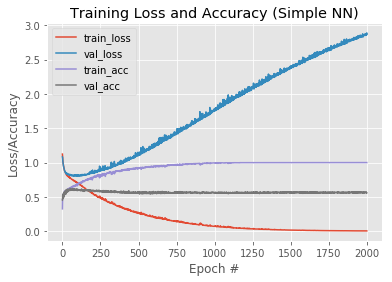

In [15]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
# plt.savefig(args["plot"])

In [16]:
print("[INFO] saving the model...")
model.save(args["model"])
print("Done")

[INFO] saving the model...
Done


In [17]:
with open(args["label_bin"], "wb") as f :
    f.write(pickle.dumps(lb))

# load the model 


In [18]:
from keras.models import load_model
model = load_model(args["model"])
lb = pickle.loads(open('./output/label_bin_simple_nn_model_mostafa','rb').read())


In [ ]:

imgs = paths.list_images('./animals/')
d=[] 
for im in imgs:
    d.append(im)
imgs = np.array(d)    
np.random.shuffle(imgs)

for img in imgs:
    img = cv2.imread(img)
    copy = cv2.resize(img, (32,32)).flatten() / 255.0 
    copy = copy.reshape(1, copy.shape[0])
    pred = model.predict(copy) 
    label = lb.classes_[pred.argmax(axis=1)][0]
    text = "{}: {:.2f}%".format(label, pred[0][pred.argmax(axis=1)[0]] * 100)
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
    cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
imgs = imgs.shuffle()
                 